In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

print("OK")

OK


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

print("OK")

OK


In [6]:
pip show pillow

Name: Pillow
Version: 9.2.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: c:\users\yabakar\anaconda3\envs\env_deeplearning\lib\site-packages
Requires: 
Required-by: matplotlib
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show tensorflow

Name: tensorflow
Version: 2.8.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\yabakar\anaconda3\envs\env_deeplearning\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip show Numpy

Name: numpy
Version: 1.23.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\yabakar\anaconda3\envs\env_deeplearning\lib\site-packages
Requires: 
Required-by: h5py, Keras-Preprocessing, matplotlib, mkl-fft, mkl-random, opt-einsum, scipy, tensorboard, tensorflow
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm


def launchConversion(pathData, pathNumpy, resizeImg, imgSize):
    """
    # Permet de lancer la conversion des images en tableau numpy
    :param pathData: chemin ou sont les
    :param pathNumpy:
    :param resizeImg:
    :param imgSize:
    """

    #Pour chaque classe
    for flowerClasse in os.listdir(pathData):
        pathFlower = pathData + '\\' + flowerClasse
        imgs = []

        #Pour chaque image d'une classe, on la charge, resize et transforme en tableau
        for imgFlower in tqdm(os.listdir(pathFlower), "Conversion de la classe : '{}'".format(flowerClasse)):
            imgFlowerPath = pathFlower + '\\' + imgFlower
            img = Image.open(imgFlowerPath)
            img.load()
            if resizeImg == True:
                img = img.resize(size=imgSize)

            data = np.asarray(img, dtype=np.float32)
            imgs.append(data)

        #Converti les gradients de pixels (allant de 0 à 255) vers des gradients compris entre 0 et 1
        imgs = np.asarray(imgs) / 255.

        #Enregistre une classe entiere en un fichier numpy
        np.save(pathNumpy + '\\ ' + flowerClasse + '.npy', imgs)
        
        
        
pathNumpy = r'C:\Users\yabakar\Documents\Config\diss1ia\Projects\DjangoRestAPI\APIProjectFolder\ImageClassifier\numpy'
pathData = r'C:\Users\yabakar\Documents\Config\diss1ia\Projects\DjangoRestAPI\APIProjectFolder\ImageClassifier\dataset'
resizeImg = True
imgSize = (50, 50)
launchConversion(pathData, pathNumpy, resizeImg, imgSize)

Conversion de la classe : 'tulip': 100%|██████████████████████████████████████████████| 20/20 [00:00<00:00, 137.47it/s]


In [2]:
import numpy as np
import os
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras.optimizers import *
from keras import regularizers

In [3]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

print("OK")

OK


In [10]:
# IMPORT
import os
from PIL import Image
import numpy as np
from tqdm import tqdm


def launchConversion(pathData, pathNumpy, resizeImg, imgSize):
    """
    # Permet de lancer la conversion des images en tableau numpy
    :param pathData: chemin ou sont les
    :param pathNumpy:
    :param resizeImg:
    :param imgSize:
    """

    #Pour chaque classe
    for flowerClasse in os.listdir(pathData):
        pathFlower = pathData + '\\' + flowerClasse
        imgs = []

        #Pour chaque image d'une classe, on la charge, resize et transforme en tableau
        for imgFlower in tqdm(os.listdir(pathFlower), "Conversion de la classe : '{}'".format(flowerClasse)):
            imgFlowerPath = pathFlower + '\\' + imgFlower
            img = Image.open(imgFlowerPath)
            img.load()
            if resizeImg == True:
                img = img.resize(size=imgSize)

            data = np.asarray(img, dtype=np.float32)
            imgs.append(data)

        #Converti les gradients de pixels (allant de 0 à 255) vers des gradients compris entre 0 et 1
        imgs = np.asarray(imgs) / 255.

        #Enregistre une classe entiere en un fichier numpy
        np.save(pathNumpy + '\\ ' + flowerClasse + '.npy', imgs)
        
        
        
pathNumpy = '.\\numpy'
pathData = '.\\dataset'
resizeImg = True
imgSize = (50, 50)
launchConversion(pathData, pathNumpy, resizeImg, imgSize)

Conversion de la classe : 'tulip': 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.03it/s]


In [15]:
# IMPORT
import numpy as np
import os
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras.optimizers import *
from keras import regularizers
import tensorflow as tf


"""
# Classe permettant d'entrainer un modèle sur une jeu de données
"""

def get_labels(path):
    """
    # Permet de recuperer les labels de nos classe, leurs indices dans le tableau et leur matrix binaire one hot encoder
    :param path: chemin ou sont stocké nos fichiers Numpy
    """

    labels = [file.replace('.npy', '') for file in os.listdir(path) if file.endswith('.npy')]
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)



def get_train_test(train_ratio, pathData):
    """
    # Retourner le dataset melanger en dataset d'entrainement et de validation selon un ratio
    :param train_ratio: permet de gerer la part entre dataset de train et de validation
    :param pathData: chemin des fichiers numpy
    """

    labels, _, _ = get_labels(pathData)
    classNumber = 0

    #On init avec le premier tableau pour avoir les bonnes dimensions pour la suite
    X = data = np.load(pathData + '\\' + labels[0] + '.npy')
    Y = np.zeros(X.shape[0])
    dimension = X[0].shape
    classNumber += 1


    #On ajoute le reste des fichiers numpy de nos classes
    for i, label in enumerate(labels[1:]):
        data = np.load(pathData + '\\' + label + '.npy')
        X = np.vstack((X, data))
        Y = np.append(Y, np.full(data.shape[0], fill_value=(i+1)))
        classNumber += 1



    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_ratio)
    return X_train, X_test, to_categorical(Y_train), to_categorical(Y_test), classNumber, dimension





"""
# Fonction main
"""

#Definition des chemins et autres variables
pathData = '.\\numpy'
trainRatio = 0.8
epochs = 1000
batch_size = 16
earlyStopPatience = 5

#Definition des callbacks

#Permet de retourner 4 metrics de suivi a chaque iteration
csv_logger = CSVLogger('.\\logs\\log_moModel.csv', append=True, separator=',')

#Permet de stopper l'entrainement quand le modèle n'entraine pluss
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=earlyStopPatience, verbose=0, mode='auto')

#Permet de sauvegarder le model a chaque iteration si il est meilleur que le precedent
check = ModelCheckpoint('.\\trainedModel\\moModel.hdf5', monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='auto')

#Recuperation de nos data pré traité
x_train, x_test, y_train, y_test, classNumber, dimension = get_train_test(trainRatio, pathData)

#On verifie les dimensions de nos données
print('DIMENSION X TRAIN ' + str(x_train.shape))
print('DIMENSION X TEST ' + str(x_test.shape))
print('DIMENSION Y TRAIN ' + str(y_train.shape))
print('DIMENSION Y TEST ' + str(y_test.shape))

#On creer le modele
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(dimension[0], dimension[1], dimension[2])))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(classNumber, activation='softmax'))

#On compile le modele
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0),
                  metrics=['accuracy'])

#On lance l'entrainement du modele
print("yala")
trainning = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early, check,csv_logger])




print("OK")

DIMENSION X TRAIN (4, 50, 50, 3)
DIMENSION X TEST (1, 50, 50, 3)
DIMENSION Y TRAIN (4, 5)
DIMENSION Y TEST (1, 2)
yala
Epoch 1/1000


ValueError: in user code:

    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 6) are incompatible


In [80]:
# IMPORT
import matplotlib.pyplot as plt
import pandas as pd

"""
# Classe permettant de génerer 4 graphiques de suivit de métriques durant l'entrainement d'un modèle
# Train accuracy, Train loss, Validation accuracy, Validation loss
"""


def displayGraph(pathLog,pathSaveGraph):
    """
    # Fonction permettant de creer nos graph de suivi de metriques
    :param pathLog: chemin du CSV contenant nos metrics
    :param pathSaveGraph: chemin de destination pour sauvegarder nos 4 graphiques en jpg
    """

    data = pd.read_csv(pathLog)
    # split into input (X) and output (Y) variables
    plot(data['epoch'], data['acc'], data['val_acc'], 'TRAIN_VAL_Accuracy', 'Epoch', 'Accuracy', 'upper left',pathSaveGraph)
    plot(data['epoch'], data['loss'], data['val_loss'], 'TRAIN_VAL_Loss', 'Epoch', 'Loss', 'upper left',pathSaveGraph)

    
    
def plot(X, Y, Y2, title, xLabel, yLabel, legendLoc, pathSaveGraph):
    """
    # Fonction d'affichage de graph
    :param X: correspond au nombre d'époch
    :param Y: correspond a la courbe accuracy
    :param Y2: correspond a la courbe loss
    :param title: titre du graphique
    :param xLabel: label des abcisses
    :param yLabel: label des ordonnees
    :param legendLoc: legende
    :param pathSaveGraph: chemin de sauvegarde pour les graphiques
    """

   #On trace nos differentes courbes
    plt.plot(Y)
    plt.plot(Y2)
   #titre du graph, legende...
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend(['train', 'val'], loc=legendLoc)
   #Pour avoir un courbe propre qui demarre à 0
    plt.xlim(xmin=0.0, xmax=max(X))
    plt.savefig(pathSaveGraph +'\\' + title)
    plt.figure()
    #plt.show()
    
    
    
#Definition des chemins d'acces a notre fichier log
pathLogs = '.\\logs\\log_moModel.csv'
pathSaveGraph = '.\\graph'
displayGraph(pathLogs,pathSaveGraph)
    
    
    


print("OK")

KeyError: 'acc'


Evaluation :


Prediction de la classe 'tulip': 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12.50it/s]



Precision : 40.000%
OK


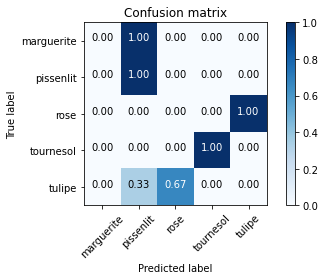

In [39]:
# IMPORT
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model


"""
# Classe permettant de génerer une matrice de confusion à partir d'un dataset de test et d'un modèle entrainé
# au préalable
"""


def generateMatrix(model, datasetTestPath, imageSize, destinationMatrix):
	"""
	# Fonction qui va construire notre matrice de confusion
	:param model: chemin du modèle à charger pour realiser la prediction
	:param datasetTestPath: chemin du dataset contenant nos images de test
	:param imageSize: definit la taille de l'ensemble de nos images
	:param destinationMatrix: définit le chemin ou va être sauvegardé notre matrice sous format d'image
	:return:
	"""

	#Les tableaux contenanrt les predictions
	y_true = []
	y_pred = []

	total = 0
	success = 0
	index = 0

	print('\nEvaluation :')
	#On parcours notre dataset de test
	for root, dirs, files in os.walk(datasetTestPath):
		for mydir in dirs:
			for sample in tqdm(os.listdir(root + '\\' + mydir), "Prediction de la classe '{}'".format(mydir)):

				sample_path = root + '\\' + mydir + '\\' + sample
				#Chargement et traitement de l'image
				img = Image.open(sample_path)
				img.load()
				img = img.resize(size=imageSize)
				img = np.asarray(img) / 255.
				#On reshape pour etre de la forme (nbImage,hauteurImage,largeurImage,nbCanaux)
				img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
				#Prediction de notre modele
				pred = np.argmax(model.predict(img))

				total += 1
				if pred == index:
					success += 1

				y_true.append(index)
				y_pred.append(pred)

			index += 1

	#Precision de notre modele sur notre jeu de test en entier
	accuracy = (success / total) * 100.
	print('\nPrecision : {0:.3f}%'.format(accuracy))


	cnf_matrix = confusion_matrix(y_true, y_pred)
	np.set_printoptions(precision=2)

	# Plot normalized confusion matrix
	plt.figure()

	cmap = plt.cm.Blues
	classes = ['marguerite', 'pissenlit', 'rose', 'tournesol', 'tulipe']
	title = 'Confusion matrix'

	cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

	#Legende de notre matrice
	plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation=45)
	plt.yticks(tick_marks, classes)

	fmt = '.2f'
	thresh = cnf_matrix.max() / 2.
	for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
		plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center", color="white" if cnf_matrix[i, j] > thresh else "black")

	plt.ylabel('True label')
	plt.xlabel('Predicted label')
	plt.tight_layout()

	#On sauvegarde notre matrice en image
	plt.savefig(destinationMatrix + '\\' + 'confusionMatrix')


    
#On definit les chemins de nos divers ressources
modelPath = '.\\trainedModel\\moModel.hdf5'
datasetTestPath = '.\\datasetTest'
destinationMatrix = '.\\graph'
imageSize = (50, 50)
model = load_model(modelPath)

generateMatrix(model, datasetTestPath, imageSize, destinationMatrix)



print("OK")

In [40]:
#IMPORT
from keras.models import load_model
from PIL import Image
import numpy as np
import time


def predict(modelPath,imagePath, imageSize, label):
    """
    # Fonction qui permet de convertir une image en array, de charger le modele et de lui injecter notre image pour une prediction
    :param modelPath: chemin du modèle au format hdf5
    :param imagePath: chemin de l'image pour realiser une prediction
    :param imageSize: défini la taille de l'image. IMPORTANT : doit être de la même taille que celle des images
    du dataset d'entrainements
    :param label: nom de nos 5 classes de sortie
    """

    start = time.time()

    # Chargement du modele
    print("Chargement du modèle :\n")
    model = load_model(modelPath)
    print("\nModel chargé.")

    #Chargement de notre image et traitement
    data = []
    img = Image.open(imagePath)
    img.load()
    img = img.resize(size=imageSize)
    img = np.asarray(img) / 255.
    data.append(img)
    data = np.asarray(data)

    #On reshape pour correspondre aux dimensions de notre modele
    # Arg1 : correspond au nombre d'image que on injecte
    # Arg2 : correspond a la largeur de l'image
    # Arg3 : correspond a la hauteur de l'image
    # Arg4 : correspond au nombre de canaux de l'image (1 grayscale, 3 couleurs)
    dimension = data[0].shape

    #Reshape pour passer de 3 à 4 dimension pour notre réseau
    data = data.astype(np.float32).reshape(data.shape[0], dimension[0], dimension[1], dimension[2])

    #On realise une prediction
    prediction = model.predict(data)


    #On recupere le numero de label qui a la plus haut prediction
    maxPredict = np.argmax(prediction)

    #On recupere le mot correspondant à l'indice precedent
    word = label[maxPredict]
    pred = prediction[0][maxPredict] * 100.
    end = time.time()


    #On affiche les prédictions
    print()
    print('----------')
    print(" Prediction :")
    for i in range(0, len(label)):
        print('     ' + label[i] + ' : ' + "{0:.2f}%".format(prediction[0][i] * 100.))

    print()
    print('RESULTAT : ' + word + ' : ' + "{0:.2f}%".format(pred))
    print('temps prediction : ' + "{0:.2f}secs".format(end-start))

    print('----------')
    
    
    
"""
# On definit les chemins d'acces au différentes hyper parametre
"""

modelPath = '.\\trainedModel\\moModel.hdf5'
imagePath =  '.\\testImage\\rose.jpg'
imageSize = (50,50)
label = ['marguerite', 'pissenlit', 'rose', 'tournesol', 'tulipe']

predict(modelPath, imagePath,imageSize, label)




print("OK")

Chargement du modèle :


Model chargé.

----------
 Prediction :
     marguerite : 0.70%
     pissenlit : 2.30%
     rose : 26.77%
     tournesol : 20.67%
     tulipe : 49.56%

RESULTAT : tulipe : 49.56%
temps prediction : 0.23secs
----------
OK


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
# from fr_utils import *
# from inception_blocks_v2 import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(threshold=np.nan)

FRmodel = faceRecoModel(input_shape=(3, 96, 96))
print("Total Params:", FRmodel.count_params())

print("OK")

ValueError: threshold must be non-NAN, try sys.maxsize for untruncated representation

In [8]:
from PIL import Image
from os.path import join
import os
import torch.utils.data as data
from .utils import download_url, check_integrity, list_dir, list_files


class Omniglot(data.Dataset):
    """`Omniglot <https://github.com/brendenlake/omniglot>`_ Dataset.
    Args:
        root (string): Root directory of dataset where directory
            ``omniglot-py`` exists.
        background (bool, optional): If True, creates dataset from the "background" set, otherwise
            creates from the "evaluation" set. This terminology is defined by the authors.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        download (bool, optional): If true, downloads the dataset zip files from the internet and
            puts it in root directory. If the zip files are already downloaded, they are not
            downloaded again.
    """
    folder = 'omniglot-py'
    download_url_prefix = 'https://github.com/brendenlake/omniglot/raw/master/python'
    zips_md5 = {
        'images_background': '68d2efa1b9178cc56df9314c21c6e718',
        'images_evaluation': '6b91aef0f799c5bb55b94e3f2daec811'
    }

    def __init__(self, root, background=True,
                 transform=None, target_transform=None,
                 download=False):
        self.root = join(os.path.expanduser(root), self.folder)
        self.background = background
        self.transform = transform
        self.target_transform = target_transform

        if download:
            self.download()

        if not self._check_integrity():
            raise RuntimeError('Dataset not found or corrupted.' +
                               ' You can use download=True to download it')

        self.target_folder = join(self.root, self._get_target_folder())
        self._alphabets = list_dir(self.target_folder)
        self._characters = sum([[join(a, c) for c in list_dir(join(self.target_folder, a))]
                                for a in self._alphabets], [])
        self._character_images = [[(image, idx) for image in list_files(join(self.target_folder, character), '.png')]
                                  for idx, character in enumerate(self._characters)]
        self._flat_character_images = sum(self._character_images, [])

    def __len__(self):
        return len(self._flat_character_images)

    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (image, target) where target is index of the target character class.
        """
        image_name, character_class = self._flat_character_images[index]
        image_path = join(self.target_folder, self._characters[character_class], image_name)
        image = Image.open(image_path, mode='r').convert('L')

        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            character_class = self.target_transform(character_class)

        return image, character_class

    def _check_integrity(self):
        zip_filename = self._get_target_folder()
        if not check_integrity(join(self.root, zip_filename + '.zip'), self.zips_md5[zip_filename]):
            return False
        return True

    def download(self):
        import zipfile

        if self._check_integrity():
            print('Files already downloaded and verified')
            return

        filename = self._get_target_folder()
        zip_filename = filename + '.zip'
        url = self.download_url_prefix + '/' + zip_filename
        download_url(url, self.root, zip_filename, self.zips_md5[filename])
        print('Extracting downloaded file: ' + join(self.root, zip_filename))
        with zipfile.ZipFile(join(self.root, zip_filename), 'r') as zip_file:
            zip_file.extractall(self.root)

    def _get_target_folder(self):
        return 'images_background' if self.background else 'images_evaluation'


def loadimgs(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        
        # every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            cat_dict[curr_y] = (alphabet, letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
            
            # read all the images in the current category
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                image = imread(image_path)
                category_images.append(image)
                y.append(curr_y)
            try:
                X.append(np.stack(category_images))
            # edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

def get_batch(batch_size,s="train"):
    """
    Create batch of n pairs, half same class, half different class
    """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    
    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
    
return pairs, targets

OSError: [WinError 182] Le système d’exploitation ne peut pas exécuter %1. Error loading "C:\Users\yabakar\Anaconda3\envs\env_deeplearning\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [6]:
import random
import numpy as np
import keras
import wandb
from wandb.keras import WandbCallback
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



       # load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255




       # make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)




       # take a peek at the data
# plt.imshow(pairs_train[400,1])
# print(labels_train[4])



       # Weights not shared

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)




model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()





wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10, callbacks=[WandbCallback()])






print("OK")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 flatten_input (InputLayer)     [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_1_input (InputLayer)   [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['flatten_input[0][0]']          
                                                                                                  
 flatten_1 (Flatten)            (None, 784)          0           ['flatten_1_input[0][0]']        
                                                                                              

accuracy,▁▂▂▃▄▅▆▆██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▆▆▅▅▄▃▂▁
GFLOPs,0.0002
accuracy,0.52511
epoch,9
loss,0.68926


Epoch 1/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.6945 - accuracy: 0.5030
Epoch 2/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.6934 - accuracy: 0.5039
Epoch 3/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.6931 - accuracy: 0.5065
Epoch 4/10
7500/7500 [==============================] - 20s 3ms/step - loss: 0.6927 - accuracy: 0.5076
Epoch 5/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.6923 - accuracy: 0.5122
Epoch 6/10
7500/7500 [==============================] - 21s 3ms/step - loss: 0.6917 - accuracy: 0.5143
Epoch 7/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6910 - accuracy: 0.5157
Epoch 8/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.6905 - accuracy: 0.5144
Epoch 9/10
7500/7500 [==============================] - 21s 3ms/step - loss: 0.6899 - accuracy: 0.5174
Epoch 10/10
7500/7500 [==============================] - 25s 3ms/step - l